### MLP 3: Classification

#### Write your name

- xiaomei Xie
- Lili Hao


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # import k-fold validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

import warnings

warnings.filterwarnings('ignore')

target_names = ['Class-0', 'Class-1', 'Class-3']

In [2]:
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    
    plt.title('Confusion matrix')
    plt.colorbar()
    
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
    

In [3]:
df = pd.read_csv('../processeddata/new_airlines_DT.csv')
df.head(2)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Time.Month.level,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,3,3,3,3,...,3,3,3,3,3,3,3,3,3.0,2.0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,1,1,2,1,...,2,1,1,1,1,1,1,1,3.0,1.0


In [4]:
col = ['# of Delays.Carrier', "Time.Month.level",
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted',  'Flights.Total', #'Flights.On Time',
       'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather', 'Ratio_Rank']

In [5]:
rankedData = df[col]
rankedData.shape

(4408, 17)

In [6]:
X = rankedData.iloc[ :, :-1]
print(X.shape)
X.head()

(4408, 16)


,# of Delays.Carrier,Time.Month.level,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Flights.Cancelled,Flights.Delayed,Flights.Diverted,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather
0,3,3.0,3,3,3,3,2,3,2,3,3,3,3,3,3,3
1,1,3.0,1,2,1,2,2,1,0,1,1,1,1,1,1,1
2,0,3.0,1,0,3,2,0,0,1,1,0,1,1,3,0,2
3,0,3.0,1,2,0,1,1,1,1,1,0,0,1,1,1,1
4,0,3.0,0,1,1,1,1,0,2,0,0,0,1,1,0,1


In [7]:
y = df.iloc[ :, -1:]
y.head()

,Ratio_Rank
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0


In [8]:
X = X.to_numpy()
print(type(X))

y = y.to_numpy()
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Ranked Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#### Decision Tree - Entropy

In [10]:
tree_clf_entropy = DecisionTreeClassifier(max_depth=8, criterion="entropy", random_state=42).fit(X_train, y_train)

score = cross_val_score(tree_clf_entropy, X_train, y_train, cv=10, scoring="accuracy")
print(score)
print(score.sum()/10)

[0.77346278 0.73462783 0.78640777 0.7184466  0.75080906 0.74675325
 0.76623377 0.71428571 0.74025974 0.73051948]
0.7461805993359392


Accuracy of  Decision Tree - entropy classifier on training set: 0.82
Accuracy of  Decision Tree - entropy classifier on test set: 0.74

confustion matrix of  Decision Tree - entropy classifier on test set and pred values: 
[[480 118   0]
 [110 409  25]
 [  0  91  90]]


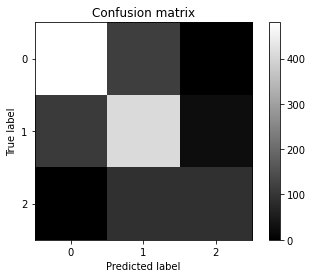


classification report  Decision Tree - entropy classifier: {:.2f}
              precision    recall  f1-score   support

     Class-0       0.81      0.80      0.81       598
     Class-1       0.66      0.75      0.70       544
     Class-3       0.78      0.50      0.61       181

    accuracy                           0.74      1323
   macro avg       0.75      0.68      0.71      1323
weighted avg       0.75      0.74      0.74      1323



In [11]:
print('Accuracy of ' , "Decision Tree - entropy" , 'classifier on training set: {:.2f}'
 .format(tree_clf_entropy.score(X_train, y_train)))

print('Accuracy of ' , "Decision Tree - entropy" , 'classifier on test set: {:.2f}'
 .format(tree_clf_entropy.score(X_test, y_test)))

y_pred = tree_clf_entropy.predict(X_test)

print()
print('confustion matrix of ' , "Decision Tree - entropy"  , 'classifier on test set and pred values: ')
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

print()
print('classification report ' , "Decision Tree - entropy"  , 'classifier: {:.2f}')
# Print classification report

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

Accuracy of DT entropy classifier on training set: 0.82
Accuracy of DT entropy classifier on test set: 0.74


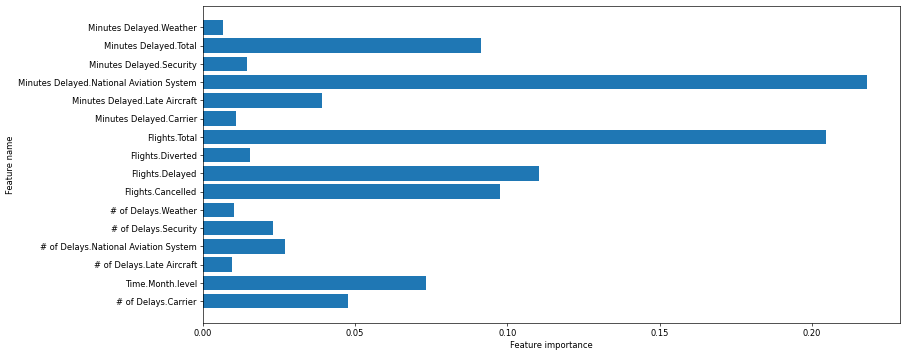

Feature importances: [0.04777589 0.07320449 0.0094668  0.0270561  0.02295793 0.01025478
 0.09765203 0.11046716 0.01543024 0.204618   0.01107091 0.03929664
 0.21804337 0.01456434 0.09138445 0.00675685]


In [12]:
col = ['# of Delays.Carrier', "Time.Month.level",
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.Total',  #'Flights.On Time', 
       'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']


print('Accuracy of DT entropy classifier on training set: {:.2f}'
     .format(tree_clf_entropy.score(X_train, y_train)))
print('Accuracy of DT entropy classifier on test set: {:.2f}'
     .format(tree_clf_entropy.score(X_test, y_test)))

plt.figure(figsize=(15,7), dpi=60)

# call the function above
plot_feature_importances(tree_clf_entropy, col)
plt.show()

print('Feature importances: {}'.format(tree_clf_entropy.feature_importances_))

accuracy:  0.9077465113597047


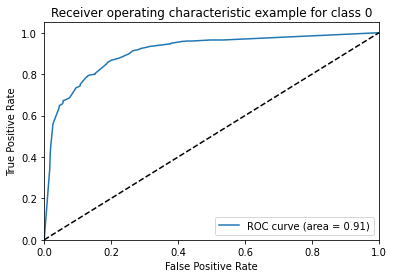

accuracy:  0.8170873291550252


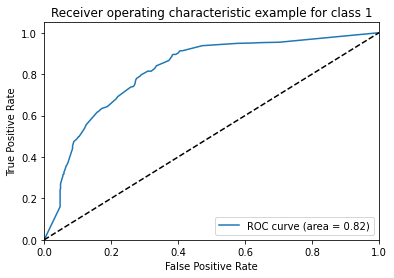

accuracy:  0.9084430726359689


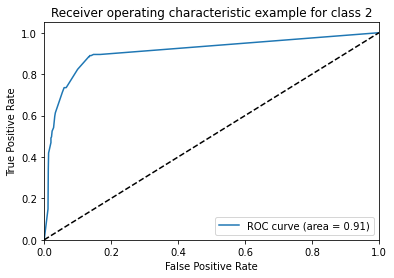

In [13]:
y_score = tree_clf_entropy.predict_proba(X_test)
    
y_test = label_binarize(y_test, classes=[1,2,3])
n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    print("accuracy: " , roc_auc[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example for class ' + str(i) )
    plt.legend(loc="lower right")
    plt.show()

#### Decision Tree Gini

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [15]:
tree_clf_gini = DecisionTreeClassifier(max_depth=8, criterion="gini", random_state=42).fit(X_train, y_train)

score = cross_val_score(tree_clf_gini, X_train, y_train, cv=10, scoring="accuracy")
print(score)
print(score.sum()/10)


[0.74433657 0.76699029 0.7184466  0.7184466  0.76699029 0.76623377
 0.74025974 0.73051948 0.71103896 0.74350649]
0.7406768797545495


Accuracy of  Decision Tree - gini classifier on training set: 0.83
Accuracy of  Decision Tree - gini classifier on test set: 0.75

confustion matrix of  Decision Tree - gini classifier on test set and pred values: 
[[490 103   1]
 [107 409  36]
 [  4  81  92]]


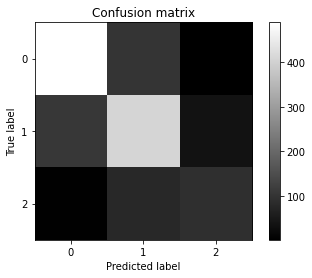


classification report  Decision Tree - gini classifier: {:.2f}
              precision    recall  f1-score   support

     Class-0       0.82      0.82      0.82       594
     Class-1       0.69      0.74      0.71       552
     Class-3       0.71      0.52      0.60       177

    accuracy                           0.75      1323
   macro avg       0.74      0.70      0.71      1323
weighted avg       0.75      0.75      0.75      1323



In [16]:
print('Accuracy of ' , "Decision Tree - gini" , 'classifier on training set: {:.2f}'
 .format(tree_clf_gini.score(X_train, y_train)))

print('Accuracy of ' , "Decision Tree - gini" , 'classifier on test set: {:.2f}'
 .format(tree_clf_gini.score(X_test, y_test)))

y_pred = tree_clf_gini.predict(X_test)

print()
print('confustion matrix of ' , "Decision Tree - gini"  , 'classifier on test set and pred values: ')
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

print()
print('classification report ' , "Decision Tree - gini"  , 'classifier: {:.2f}')
# Print classification report

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

Accuracy of DT gini classifier on training set: 0.83
Accuracy of DT gini classifier on test set: 0.75


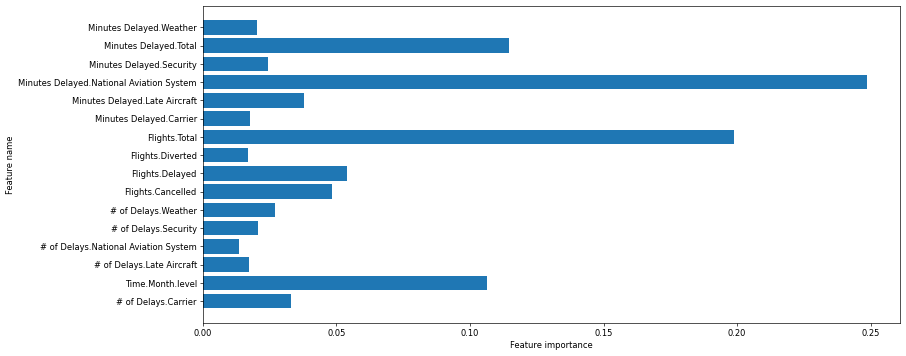

Feature importances: [0.03315712 0.10626086 0.01738817 0.01367414 0.02064453 0.02715622
 0.04847229 0.05409349 0.01702622 0.19868144 0.01777215 0.03780427
 0.24857238 0.02442032 0.11452765 0.02034875]


In [17]:
col = ['# of Delays.Carrier', "Time.Month.level",
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.Total', #'Flights.On Time', 
       'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']


print('Accuracy of DT gini classifier on training set: {:.2f}'
     .format(tree_clf_gini.score(X_train, y_train)))
print('Accuracy of DT gini classifier on test set: {:.2f}'
     .format(tree_clf_gini.score(X_test, y_test)))

plt.figure(figsize=(15,7), dpi=60)

# call the function above
plot_feature_importances(tree_clf_gini, col)
plt.show()

print('Feature importances: {}'.format(tree_clf_gini.feature_importances_))

accuracy:  0.8841824740315823


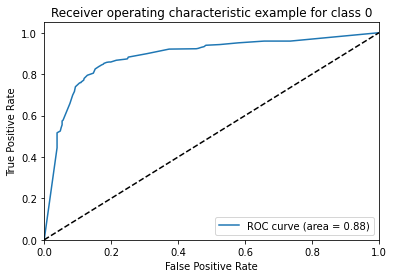

accuracy:  0.8071545047839245


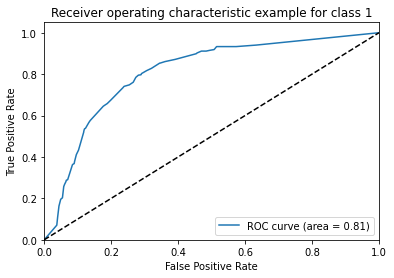

accuracy:  0.9051577089557389


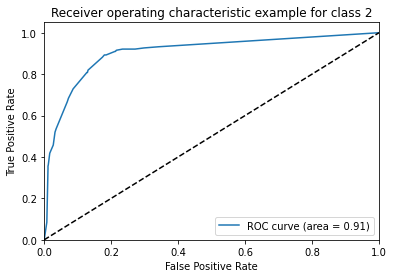

In [18]:
y_score = tree_clf_gini.predict_proba(X_test)
    
y_test = label_binarize(y_test, classes=[1,2,3])
n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    print("accuracy: " , roc_auc[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example for class ' + str(i) )
    plt.legend(loc="lower right")
    plt.show()

### KNN

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)

score = cross_val_score(knn, X_train, y_train, cv=10, scoring="accuracy")
print(score)
print(score.sum()/10)

modelName = "KNN"

[0.77346278 0.74757282 0.72815534 0.74433657 0.71521036 0.74350649
 0.76298701 0.71753247 0.73701299 0.73376623]
0.7403543058882865


Accuracy of  KNN classifier on training set: 0.77
Accuracy of  KNN classifier on test set: 0.72

confustion matrix of  KNN classifier on test set and pred values: 
[[478 111   0]
 [124 414   9]
 [  3 119  65]]


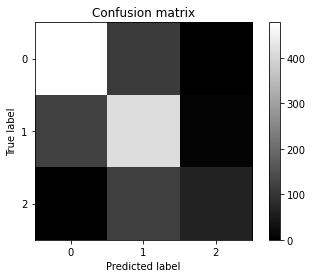


classification report  KNN classifier: {:.2f}
              precision    recall  f1-score   support

     Class-0       0.79      0.81      0.80       589
     Class-1       0.64      0.76      0.70       547
     Class-3       0.88      0.35      0.50       187

    accuracy                           0.72      1323
   macro avg       0.77      0.64      0.66      1323
weighted avg       0.74      0.72      0.71      1323



In [21]:
print('Accuracy of ' , modelName , 'classifier on training set: {:.2f}'
 .format(knn.score(X_train, y_train)))

print('Accuracy of ' , modelName , 'classifier on test set: {:.2f}'
 .format(knn.score(X_test, y_test)))

y_pred = knn.predict(X_test)

print()
print('confustion matrix of ' , modelName  , 'classifier on test set and pred values: ')
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

print()
print('classification report ' , modelName  , 'classifier: {:.2f}')
# Print classification report

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

accuracy:  0.9051132710038259


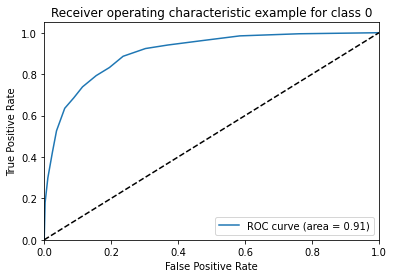

accuracy:  0.8053228481501724


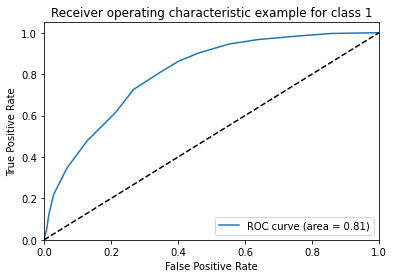

accuracy:  0.9206357799201625


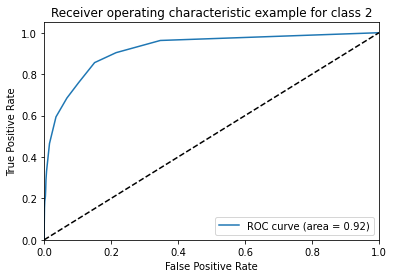

In [22]:
y_score = knn.predict_proba(X_test)
    
y_test = label_binarize(y_test, classes=[1,2,3])
n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    print("accuracy: " , roc_auc[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example for class ' + str(i) )
    plt.legend(loc="lower right")
    plt.show()

### Naive Bays

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [24]:
modelName = "Naive Bays"
nbclf = GaussianNB().fit(X_train, y_train)

score = cross_val_score(nbclf, X_train, y_train, cv=10, scoring="accuracy")
print(score)
print(score.sum()/10)

[0.55016181 0.55016181 0.54692557 0.51779935 0.57928803 0.54545455
 0.55844156 0.51948052 0.53896104 0.54220779]
0.5448882024124743


Accuracy of  Naive Bayes classifier on training set: 0.55
Accuracy of  Naive Bayes classifier on test set: 0.53

confustion matrix of  Naive Bayes classifier on test set and pred values: 
[[404  97  90]
 [198 151 193]
 [  9  37 144]]


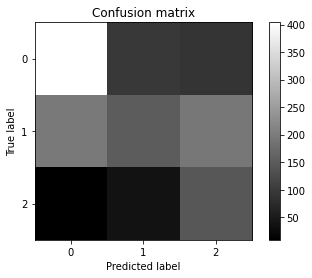


classification report  Naive Bayes classifier: {:.2f}
              precision    recall  f1-score   support

     Class-0       0.66      0.68      0.67       591
     Class-1       0.53      0.28      0.37       542
     Class-3       0.34      0.76      0.47       190

    accuracy                           0.53      1323
   macro avg       0.51      0.57      0.50      1323
weighted avg       0.56      0.53      0.52      1323



In [25]:
print('Accuracy of ' , "Naive Bayes" , 'classifier on training set: {:.2f}'
 .format(nbclf.score(X_train, y_train)))

print('Accuracy of ' , "Naive Bayes" , 'classifier on test set: {:.2f}'
 .format(nbclf.score(X_test, y_test)))

y_pred = nbclf.predict(X_test)

print()
print('confustion matrix of ' , "Naive Bayes"  , 'classifier on test set and pred values: ')
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

print()
print('classification report ' , "Naive Bayes"  , 'classifier: {:.2f}')
# Print classification report

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

accuracy:  0.7739949423501891


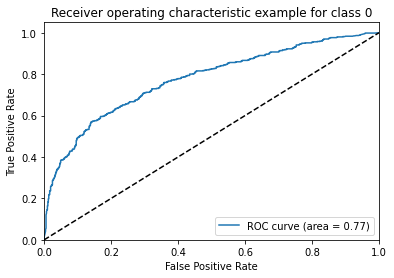

accuracy:  0.6530384926128391


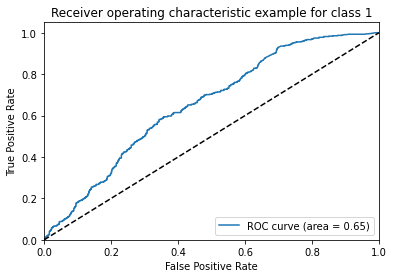

accuracy:  0.8204162214892926


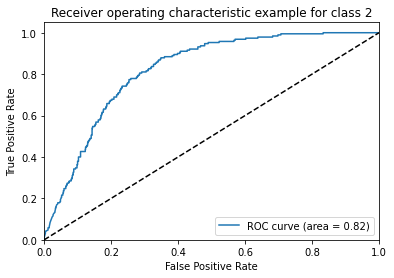

In [26]:
y_score = nbclf.predict_proba(X_test)
    
y_test = label_binarize(y_test, classes=[1,2,3])
n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    print("accuracy: " , roc_auc[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example for class ' + str(i) )
    plt.legend(loc="lower right")
    plt.show()

### Normalizd Data

In [27]:
df = pd.read_csv('../processeddata/new_airlines_normalized.csv')
df.head(2)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Time.Month.level,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,0.301513,0.270412,0.350472,0.189474,...,0.770892,0.258823,0.185741,0.194317,0.104668,0.260628,0.253219,3.0,0.797538,2.0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,0.088067,0.093018,0.069295,0.042105,...,0.199003,0.066594,0.067780,0.037010,0.020004,0.064041,0.053621,3.0,0.816993,1.0


In [28]:
normalizedData = df[col]
normalizedData.shape

(4408, 16)

In [29]:
X = normalizedData.iloc[ :, :-1]
print(X.shape)
X.head()

(4408, 15)


,# of Delays.Carrier,Time.Month.level,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Flights.Cancelled,Flights.Delayed,Flights.Diverted,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total
0,0.301513,3.0,0.270412,0.350472,0.189474,0.403206,0.057928,0.414431,0.061086,0.770892,0.258823,0.185741,0.194317,0.104668,0.260628
1,0.088067,3.0,0.093018,0.069295,0.042105,0.080148,0.036715,0.099881,0.006787,0.199003,0.066594,0.067780,0.037010,0.020004,0.064041
2,0.061849,3.0,0.088924,0.036424,0.094737,0.094945,0.007071,0.071705,0.033937,0.161140,0.035474,0.063728,0.025609,0.056173,0.051023
3,0.063193,3.0,0.087787,0.074847,0.031579,0.065351,0.019037,0.095334,0.031674,0.171866,0.040725,0.053647,0.036017,0.025662,0.052444
4,0.057479,3.0,0.041392,0.047307,0.052632,0.070284,0.019309,0.060897,0.040724,0.111460,0.036125,0.025243,0.031345,0.024247,0.038985


In [30]:
y = df.iloc[ :, -1:]
y.head()

,Ratio_Rank
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0


### KNN

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [32]:
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)

score = cross_val_score(knn, X_train, y_train, cv=10, scoring="accuracy")
print(score)
print(score.sum()/10)

[0.85113269 0.8381877  0.84466019 0.81229773 0.85113269 0.82467532
 0.82792208 0.85064935 0.81168831 0.8538961 ]
0.8366242172067416


Accuracy of  knn classifier on training set: 0.87
Accuracy of  knn classifier on test set: 0.84

confustion matrix of  knn classifier on test set and pred values: 
[[545  41   0]
 [ 73 483  12]
 [  0  85  84]]


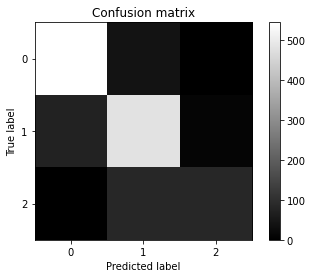


classification report  knn classifier: {:.2f}
              precision    recall  f1-score   support

     Class-0       0.88      0.93      0.91       586
     Class-1       0.79      0.85      0.82       568
     Class-3       0.88      0.50      0.63       169

    accuracy                           0.84      1323
   macro avg       0.85      0.76      0.79      1323
weighted avg       0.84      0.84      0.83      1323



In [33]:
print('Accuracy of ' , "knn" , 'classifier on training set: {:.2f}'
 .format(knn.score(X_train, y_train)))

print('Accuracy of ' , "knn" , 'classifier on test set: {:.2f}'
 .format(knn.score(X_test, y_test)))

y_pred = knn.predict(X_test)

print()
print('confustion matrix of ' , "knn"  , 'classifier on test set and pred values: ')
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

print()
print('classification report ' , "knn"  , 'classifier: {:.2f}')
# Print classification report

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

accuracy:  0.9751263076488486


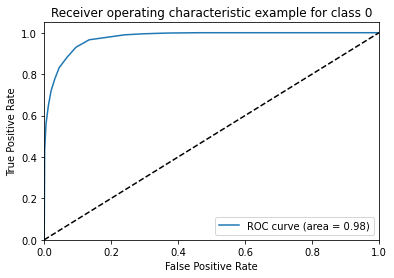

accuracy:  0.910524904393247


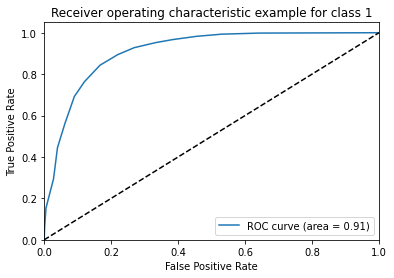

accuracy:  0.9647457262108641


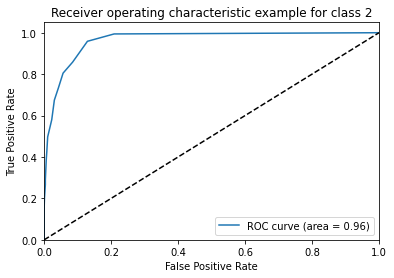

In [34]:
y_score = knn.predict_proba(X_test)
    
y_test = label_binarize(y_test, classes=[1,2,3])
n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    print("accuracy: " , roc_auc[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example for class ' + str(i) )
    plt.legend(loc="lower right")
    plt.show()

### Naive Bayes

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [36]:
modelName = "Naive Bays"
nbclf = GaussianNB().fit(X_train, y_train)

score = cross_val_score(nbclf, X_train, y_train, cv=10, scoring="accuracy")
print(score)
print(score.sum()/10)


[0.53398058 0.52750809 0.52750809 0.53074434 0.55339806 0.50649351
 0.59090909 0.52922078 0.52272727 0.52922078]
0.535171058714748


Accuracy of  Naive Bays classifier on training set: 0.54
Accuracy of  Naive Bays classifier on test set: 0.53

confustion matrix of  Naive Bays classifier on test set and pred values: 
[[519  54  18]
 [380 131  60]
 [ 25  85  51]]


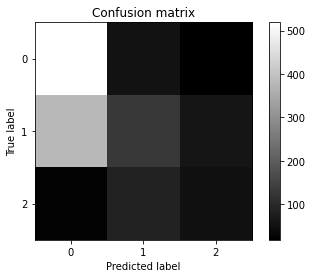


classification report  Naive Bays classifier: {:.2f}
              precision    recall  f1-score   support

     Class-0       0.56      0.88      0.69       591
     Class-1       0.49      0.23      0.31       571
     Class-3       0.40      0.32      0.35       161

    accuracy                           0.53      1323
   macro avg       0.48      0.47      0.45      1323
weighted avg       0.51      0.53      0.48      1323



In [37]:
print('Accuracy of ' , modelName, 'classifier on training set: {:.2f}'
 .format(nbclf.score(X_train, y_train)))

print('Accuracy of ' , modelName , 'classifier on test set: {:.2f}'
 .format(nbclf.score(X_test, y_test)))

y_pred = nbclf.predict(X_test)

print()
print('confustion matrix of ' , modelName  , 'classifier on test set and pred values: ')
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

print()
print('classification report ' , modelName  , 'classifier: {:.2f}')
# Print classification report

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

accuracy:  0.7841137092822205


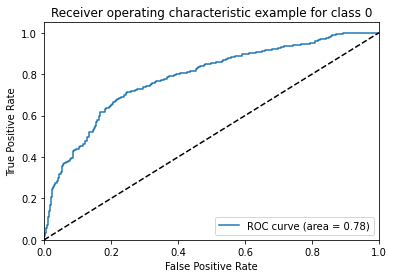

accuracy:  0.6214717554123038


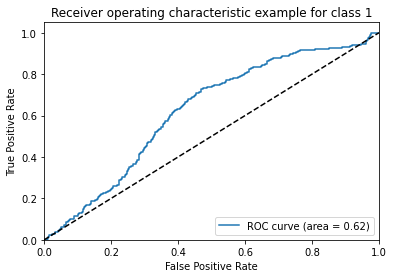

accuracy:  0.8514662019862947


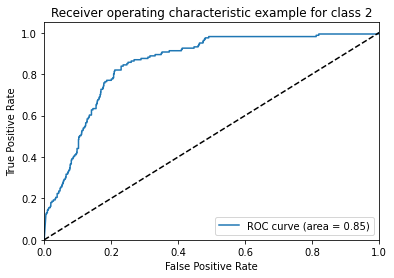

In [38]:
y_score = nbclf.predict_proba(X_test)
    
y_test = label_binarize(y_test, classes=[1,2,3])
n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    print("accuracy: " , roc_auc[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example for class ' + str(i) )
    plt.legend(loc="lower right")
    plt.show()